<h1><font color="Purple">Final Project ML course</font></h1>



### Amir Motiei - 329453062
### Amit Moshe Frastai - 216205443

---

## Let us predict if someone will die in 5 years, based on 12438 people.
## This is a classification problem where the outcomes are already known, and the goal is to develop a model that predicts the best results.

<hr style="border: 2px solid black;"/>

<h2><b><u>TOC</u></b></h2>

- [Part 1 - Inspecting The Data](#part-1-inspecting-the-data)<br>
- [Part 2 - Visualize](#part-2-visualize)<br>
- [Part 3 - Fixing the data](#Part-3-Fixing-the-data)<br>
- [Part 4 - Models](#Part-4-Models)<br>
- [Part 5 - After PCA](#Part-5-After-PCA)

<hr style="border: 2px solid black;"/>

In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob

<h2><u><b id="part-1-inspecting-the-data">Part 1 - Inspecting The Data</b></u></h2>

In [ ]:
data = pd.read_csv(r"/Users/amitmoshefrastai/Downloads/death_prediction_synthetic.csv")

In [ ]:
data.head()

,age,sex,marital_status,ses,residence_cd,residence,weigh,heigh,BMI,bp_sys,...,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y
0,49,2,U,1,1,urban,84.0,160.0,32.79,116,...,0.12908,1,0,0,1,0,1,1,0,0
1,46,2,M,1,1,urban,67.0,152.0,29.38,113,...,0.08500,1,0,0,0,0,1,1,0,0
2,46,2,U,1,1,urban,62.4,148.0,28.31,133,...,0.10715,1,0,0,1,0,1,1,0,0
3,45,1,U,2,1,urban,73.9,166.0,26.85,100,...,0.10110,1,0,0,0,0,0,1,0,0
4,49,2,U,1,1,urban,53.0,161.0,20.45,110,...,0.03950,1,0,0,0,0,0,1,0,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12438 entries, 0 to 12437
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  12438 non-null  int64  
 1   sex                  12438 non-null  int64  
 2   marital_status       12438 non-null  object 
 3   ses                  12438 non-null  int64  
 4   residence_cd         12438 non-null  int64  
 5   residence            12438 non-null  object 
 6   weigh                12438 non-null  float64
 7   heigh                12438 non-null  float64
 8   BMI                  12438 non-null  float64
 9   bp_sys               12438 non-null  int64  
 10  bp_dias              12438 non-null  int64  
 11  bp_cat               12438 non-null  object 
 12  smoking              12438 non-null  int64  
 13  smoking_status       12438 non-null  object 
 14  HbA1c                12438 non-null  float64
 15  glucose              12438 non-null 

#### Looks normal, some columns has lot of nulls, will handle it later down the line.

---


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,12438.0,43.501126,4.802035,30.00000,41.0000,45.00000,48.00000,49.00000
sex,12438.0,1.468805,0.499046,1.00000,1.0000,1.00000,2.00000,2.00000
ses,12438.0,1.677279,0.763641,1.00000,1.0000,1.00000,2.00000,3.00000
residence_cd,12438.0,1.062631,0.242307,1.00000,1.0000,1.00000,1.00000,2.00000
weigh,12438.0,89.837746,19.296247,41.00000,76.0000,88.00000,100.00000,203.00000
heigh,12438.0,167.943906,10.068620,91.50000,160.0000,168.00000,175.00000,202.00000
BMI,12438.0,31.871922,6.459714,15.79000,27.4000,31.05000,35.35000,95.55000
bp_sys,12438.0,124.803988,13.615760,75.00000,118.0000,124.00000,130.00000,200.00000
bp_dias,12438.0,77.315163,8.915362,40.00000,70.0000,79.00000,80.00000,135.00000
smoking,12438.0,1.636678,0.871735,1.00000,1.0000,1.00000,3.00000,3.00000


#### Nice, but cancer's Max is ZERO ?


In [ ]:
data['cancer'].value_counts()

cancer
0    12438
Name: count, dtype: int64

#### cancer has zeros all the way. Can be dropped.

In [ ]:
data=data.drop(["cancer"],axis=1)
data.head()

,age,sex,marital_status,ses,residence_cd,residence,weigh,heigh,BMI,bp_sys,...,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cardiovascular_meds,statines,immigrant,dead_5y
0,49,2,U,1,1,urban,84.0,160.0,32.79,116,...,1,0.12908,1,0,0,1,1,1,0,0
1,46,2,M,1,1,urban,67.0,152.0,29.38,113,...,1,0.08500,1,0,0,0,1,1,0,0
2,46,2,U,1,1,urban,62.4,148.0,28.31,133,...,1,0.10715,1,0,0,1,1,1,0,0
3,45,1,U,2,1,urban,73.9,166.0,26.85,100,...,1,0.10110,1,0,0,0,0,1,0,0
4,49,2,U,1,1,urban,53.0,161.0,20.45,110,...,1,0.03950,1,0,0,0,0,1,0,0


---

#### Is there any duplicates?

In [ ]:
copy_data = data.copy()
copy_data.drop_duplicates()
copy_data.shape

(12438, 44)

#### Nope.

<hr style="border: 2px solid black;"/>


<h2><u><b id="part-2-visualize">Part 2 - Visualize</b></u></h2>

#### Lets take a quick look at Correlations:

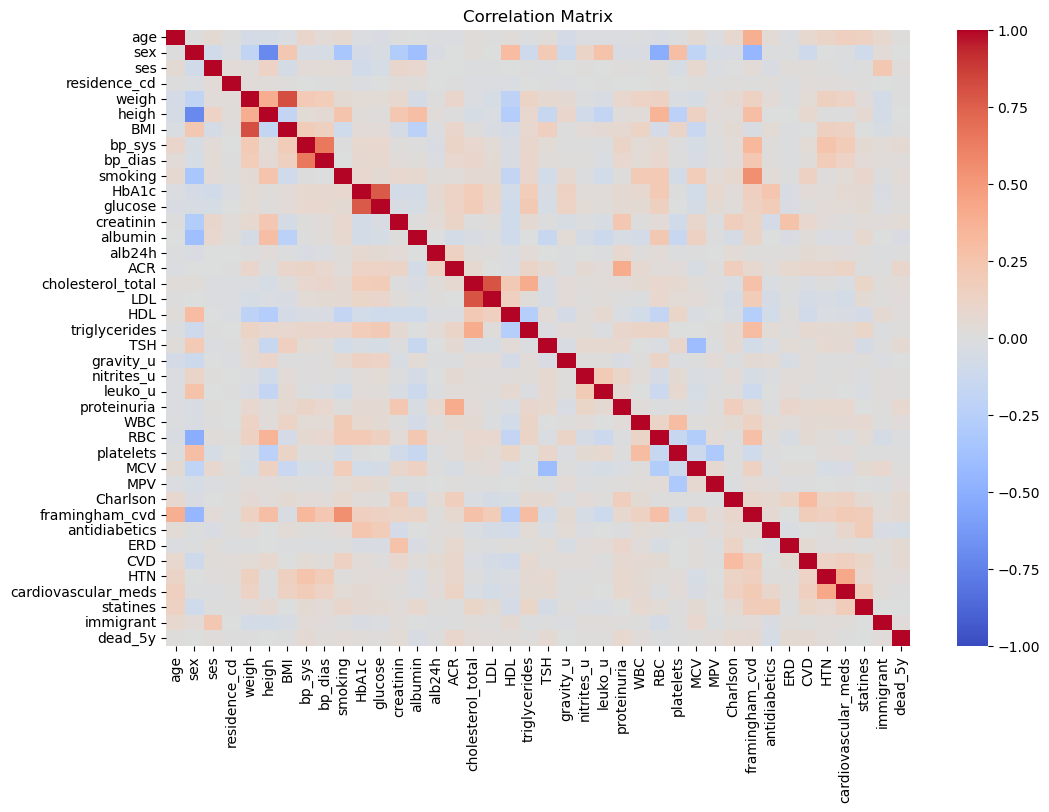

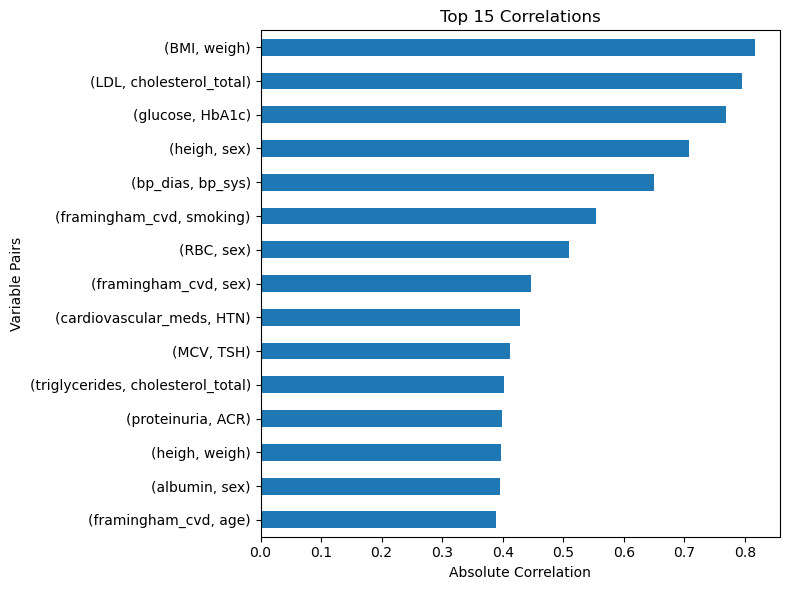

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12,8))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


correlation_mat = data.corr(numeric_only=True)
# Exclude diagonal and duplicate entries, and get the absolute values
upper_triangle = correlation_mat.where(np.triu(np.ones(correlation_mat.shape), k=1).astype(bool))
upper_triangle_abs = upper_triangle.abs().unstack()

# Sort the values to get the top 10 correlations
top_10_correlations = upper_triangle_abs.sort_values(ascending=False).head(15)

plt.figure(figsize=(8, 6))
bar_plot  = top_10_correlations.plot(kind='barh')

plt.xlabel('Absolute Correlation')
plt.ylabel('Variable Pairs')
bar_plot.invert_yaxis()
plt.title('Top 15 Correlations')
plt.tight_layout()

plt.show()


$$
\text{BMI} = \frac{\text{weight (kg)}}{(\text{height (m)})^2}
$$


#### - **BMI** is a more comprehensive indicator of health because it normalizes **weight** by **height**. So we can drop **weight**.<br><br>
#### - **BMI** already accounts for **height**, and **sex** may reflect **height**, So we will drop that too.<br><br>
#### - **HbA1c** is preferred over **glucose** because it measures blood sugar levels over a longer period of time. We can drop **glucose**.<br>

#### - **LDL** and **cholesterol_total** are closely related, so we will drop **LDL**, like before, since:<br>

$$
\text{Total Cholesterol} = \text{HDL} + \text{LDL} + \frac{\text{triglycerides}}{5}
$$



#### lets take a quick visual look before droping all, kind of because the same reasons:

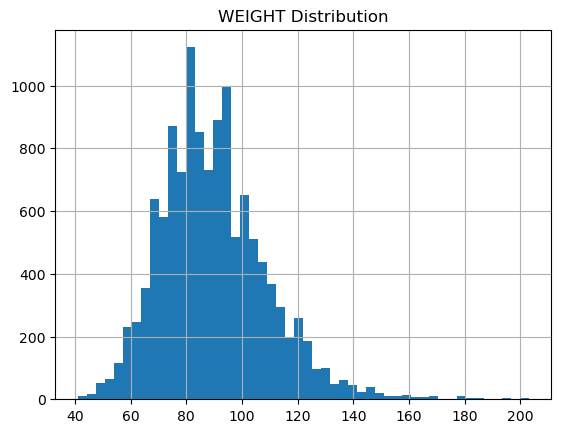

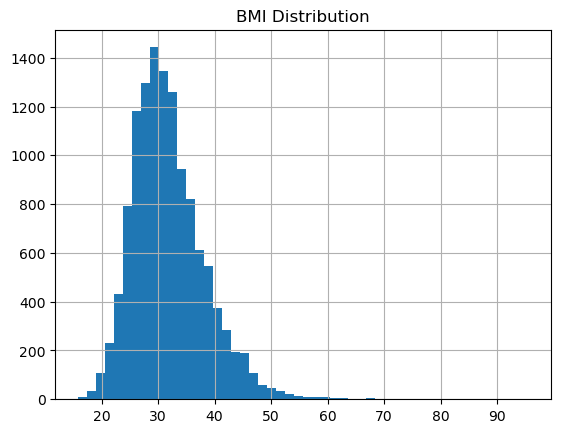

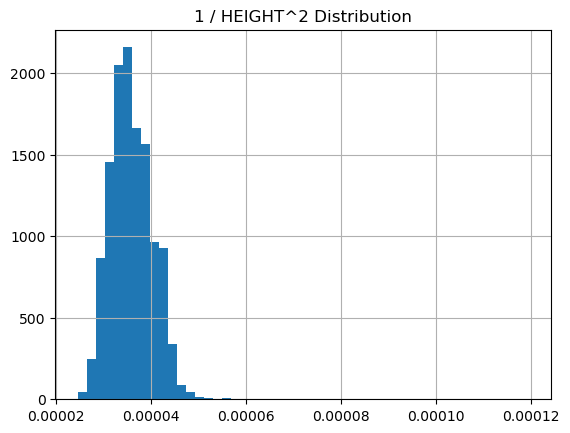

In [ ]:
# WEIGHT histogram
data["weigh"].hist(bins=50)
plt.title('WEIGHT Distribution')
plt.show()
# BMI histogram
data["BMI"].hist(bins=50)
plt.title('BMI Distribution')
plt.show()
# 1 / HEIGHT^2 histogram
(1 / data["heigh"] ** 2).hist(bins=50)
plt.title('1 / HEIGHT^2 Distribution')
plt.show()

#### Pretty similar.

In [ ]:
data=data.drop(["weigh","glucose","heigh", "LDL"],axis=1)

---

### Trial and Error:


#### $$\text{ACR} = \frac{\text{Albumin}}{\text{Creatinine}}$$
#### Because it is just a relation between two paramaters we has, we can drop it


In [ ]:
data=data.drop(["ACR"],axis=1)

---

#### Lets check if **ses** (social economic status) has a correlation to dead_5y:

In [ ]:
data[['ses', 'dead_5y']].groupby(['ses'], as_index = False).mean()

,ses,dead_5y
0,1,0.012896
1,2,0.018252
2,3,0.019850


#### Its very intresting, we assumed that the higher your **social-economic status** is, the lower your chance of **death in 5 years** would be. <br>
#### BUT, now we understand that the exact oppsite happens. <br>
#### Maybe it has important impact on **death in 5 years**. thats why we will not rush to drop **ses**.

In [ ]:
# Now we'll check if ses is correlated with any variable.
ses_corr = pd.DataFrame(data.corr(numeric_only=True).unstack()["ses"])
ses_corr.sort_values(by=0, ascending=False)

,0
ses,1.000000
immigrant,0.220889
creatinin,0.087466
albumin,0.078656
MCV,0.077702
age,0.047965
bp_dias,0.042139
framingham_cvd,0.036928
residence_cd,0.036240
smoking,0.035345


#### We don't see a strong correlation between **ses** to anything. which is telling us again - maybe it has important impact on **death_5y**. <br>
#### That's why we decided to keep **ses**.

In [ ]:
#data=data.drop(["ses"],axis=1)

---

#### Lets check if **martial_status** has a correlactaion to dead_5y

In [ ]:
data[['marital_status', 'dead_5y']].groupby(['marital_status'], as_index = False).mean()

,marital_status,dead_5y
0,M,0.006911
1,U,0.035376


#### Very interesting, more singles died than married people, so it's possibole it has an impact whether you die (or not) in the next 5 years. Therefore, we won't delete the column.

---

#### Lets check if the residence has any correlation to death

In [ ]:
data[['residence', 'dead_5y']].groupby(['residence'], as_index = False).mean()

,residence,dead_5y
0,rural,0.016688
1,urban,0.015782


#### Lets check if **dead_5y** is correlated with other variables when **residence** = **rural** or **urban**.

In [ ]:
#checking on rural
corr_res = pd.DataFrame(data.loc[data.residence == 'rural'].corr(numeric_only=True)["dead_5y"])
corr_res.sort_values(by="dead_5y", ascending=False)

,dead_5y
dead_5y,1.000000
TSH,0.160748
cholesterol_total,0.087047
albumin,0.049369
immigrant,0.048007
MCV,0.037593
ses,0.037478
proteinuria,0.029471
leuko_u,0.028031
HbA1c,0.025261


In [ ]:
#checking on urban
corr_res = pd.DataFrame(data.loc[data.residence == 'urban'].corr(numeric_only=True)["dead_5y"])
corr_res.sort_values(by="dead_5y", ascending=False)

,dead_5y
dead_5y,1.000000
Charlson,0.078520
proteinuria,0.075987
CVD,0.065809
bp_sys,0.060962
framingham_cvd,0.058747
ERD,0.056653
creatinin,0.050191
TSH,0.044155
smoking,0.037234


In [ ]:
data=data.drop(["residence","residence_cd"],axis=1)

#### we found that there is no correlation between **dead_5y** and other variables when **residence** = **rural** or **urban**, and on average the same amount of people died from both places. so we will delete the **residence** column.

In [ ]:
data.head(20)

,age,sex,marital_status,ses,BMI,bp_sys,bp_dias,bp_cat,smoking,smoking_status,...,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cardiovascular_meds,statines,immigrant,dead_5y
0,49,2,U,1,32.79,116,66,Normal,1,non_smoker,...,1,0.12908,1,0,0,1,1,1,0,0
1,46,2,M,1,29.38,113,74,Normal,1,non_smoker,...,1,0.08500,1,0,0,0,1,1,0,0
2,46,2,U,1,28.31,133,87,Pre-HTN,1,non_smoker,...,1,0.10715,1,0,0,1,1,1,0,0
3,45,1,U,2,26.85,100,63,Normal,3,current_smoker,...,1,0.10110,1,0,0,0,0,1,0,0
4,49,2,U,1,20.45,110,70,Normal,1,non_smoker,...,1,0.03950,1,0,0,0,0,1,0,0
5,41,1,M,1,28.86,115,80,Normal,3,current_smoker,...,1,0.15690,1,0,0,0,1,0,0,0
6,46,2,U,2,30.27,123,84,Normal,3,current_smoker,...,1,0.12122,1,0,0,1,1,0,0,0
7,47,1,M,2,27.92,120,80,Normal,1,non_smoker,...,2,0.11748,1,0,0,0,1,1,0,0
8,42,1,M,1,28.41,110,60,Normal,1,non_smoker,...,1,0.04838,0,0,0,0,0,0,0,0
9,44,2,M,1,26.77,137,76,Pre-HTN,1,non_smoker,...,2,0.09586,1,0,0,0,0,0,0,0


#### bp_cat is based on bp_sys and bp_dias. This means that this column depends on other columns. we consider dropping it.

In [ ]:
data[['bp_cat', 'dead_5y']].groupby(['bp_cat'], as_index = False).mean().sort_values(by="dead_5y")

,bp_cat,dead_5y
4,Pre-HTN,0.012816
3,Normal,0.013074
0,HTN-G1,0.021289
1,HTN-G2,0.057221
2,HTN-G3,0.080000


levels of blood pressure (low to high):<br>
Normal <br>
Pre-HTN <br>
HTN-G1 <br>
HTN-G2 <br>
HTN-G3 <br>

#### we can see that the higher your blood pressure is, the higher your chance to die in the next 5 years (except of Normal and Pre-HTN which are almost the same). <br>
#### at first glance, we wanted to delete bp_cat because of common sense telling us that because this column depends on other columns it should be dropped. <br>
#### BUT, bp_cat is a categorized value which based on 2 continuous variables. bp_cat can also simplify the information that bp_sys and bp_dias contain and by that the model can learn better. <br>
#### So, bp_cat will not be dropped.


---

#### we can see also that smoking_status is equal to smoking (non_smoker=1,past_smoker=2,current_smoker=3)

In [ ]:
data=data.drop(["smoking_status"],axis=1)

---

#### Lets check if immigrants have more chance of dying - making sense

In [ ]:
data[['immigrant', 'dead_5y']].groupby(['immigrant'], as_index = False).mean()

,immigrant,dead_5y
0,0,0.014128
1,1,0.023908


In [ ]:
pd.crosstab(data["immigrant"], data['dead_5y'])

dead_5y,0,1
immigrant,,
0,10118,145
1,2123,52



#### Immigrants have a higher probability of dying compared to non-immigrants. Therefore, we will retain this parameter.

<hr style="border: 2px solid black;"/>


 <h2><u><b id="Part-3-Fixing-the-data">Part 3 - Fixing the data</b></u></h2>

/var/folders/ps/dps722j958z9xcw1thb4fcqr0000gn/T/ipykernel_85693/3752300158.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Features', y='Missing Values', data=missing_df, palette='coolwarm')  # Removed hue


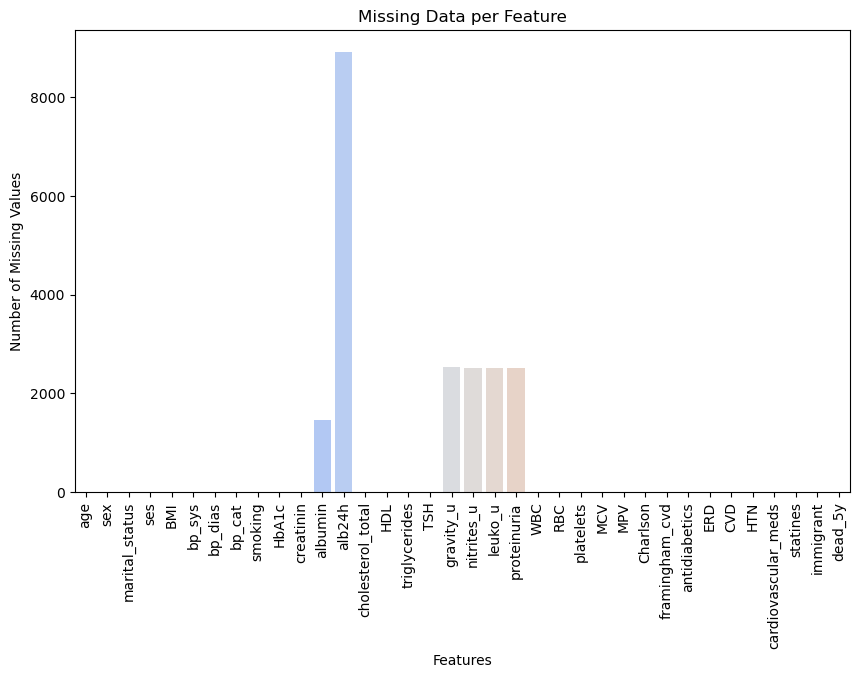

In [ ]:
#Missing Data per Feature Graph

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Checking for missing data
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100

# Create a DataFrame for plotting
missing_df = pd.DataFrame({'Features': missing_data.index, 'Missing Values': missing_data.values})

# Plot missing data
plt.figure(figsize=(10, 6))
sns.barplot(x='Features', y='Missing Values', data=missing_df, palette='coolwarm')  # Removed hue
plt.xticks(rotation=90)
plt.title("Missing Data per Feature")
plt.ylabel("Number of Missing Values")
plt.show()







In [ ]:
data=data.drop(["alb24h"],axis=1)


#### We removed alb24h because there were too few values. Filling them with the median could distort the results since it relates to kidney issues, so we chose to leave it out.

#### For example: **ERD**

In [ ]:
data[['ERD', 'dead_5y']].groupby(['ERD'], as_index = False).mean()

,ERD,dead_5y
0,0,0.015296
1,1,0.097561


#### Chances higher by almost 6.5 times.

---

#### Fill all the NULLS:

In [ ]:
# Columns to fill missing values
columns_to_fill = ['albumin', 'gravity_u', 'nitrites_u', 'leuko_u', 'proteinuria']

for column in columns_to_fill:
    data[column] = data[column].fillna(data[column].median())  # Assign the result back to the DataFrame


In [ ]:
data

,age,sex,marital_status,ses,BMI,bp_sys,bp_dias,bp_cat,smoking,HbA1c,...,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cardiovascular_meds,statines,immigrant,dead_5y
0,49,2,U,1,32.79,116,66,Normal,1,11.0,...,1,0.12908,1,0,0,1,1,1,0,0
1,46,2,M,1,29.38,113,74,Normal,1,7.0,...,1,0.08500,1,0,0,0,1,1,0,0
2,46,2,U,1,28.31,133,87,Pre-HTN,1,11.8,...,1,0.10715,1,0,0,1,1,1,0,0
3,45,1,U,2,26.85,100,63,Normal,3,6.9,...,1,0.10110,1,0,0,0,0,1,0,0
4,49,2,U,1,20.45,110,70,Normal,1,8.7,...,1,0.03950,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12433,46,1,U,2,18.78,130,80,Pre-HTN,1,7.3,...,1,0.11655,1,0,0,0,1,0,0,0
12434,45,2,M,1,38.16,100,60,Normal,1,6.8,...,1,0.05701,1,0,0,0,0,1,0,0
12435,49,1,U,1,21.77,104,69,Normal,3,7.7,...,3,0.41620,0,0,1,1,1,1,0,0
12436,47,2,M,1,35.60,96,61,Normal,1,6.2,...,1,0.03483,1,0,0,0,0,1,0,0


In [ ]:
data['dead_5y'].value_counts()

dead_5y
0    12241
1      197
Name: count, dtype: int64

#### We must balance this data by over sampling!

#### But, First:

In [ ]:
data['marital_status'] = data['marital_status'].map({'U':0, 'M':1}).astype(int)
data.head()

,age,sex,marital_status,ses,BMI,bp_sys,bp_dias,bp_cat,smoking,HbA1c,...,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cardiovascular_meds,statines,immigrant,dead_5y
0,49,2,0,1,32.79,116,66,Normal,1,11.0,...,1,0.12908,1,0,0,1,1,1,0,0
1,46,2,1,1,29.38,113,74,Normal,1,7.0,...,1,0.08500,1,0,0,0,1,1,0,0
2,46,2,0,1,28.31,133,87,Pre-HTN,1,11.8,...,1,0.10715,1,0,0,1,1,1,0,0
3,45,1,0,2,26.85,100,63,Normal,3,6.9,...,1,0.10110,1,0,0,0,0,1,0,0
4,49,2,0,1,20.45,110,70,Normal,1,8.7,...,1,0.03950,1,0,0,0,0,1,0,0


#### Over sampling for the data:

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming your dataset is a pandas DataFrame
# 'dead_5y' is the target column indicating if a person died within 5 years
# Convert categorical columns in X to numeric
X = pd.get_dummies(data.drop(columns=['dead_5y']), drop_first=True)  # One-hot encoding
y = data['dead_5y']  # Target column

# Apply SMOTE to balance the classes in the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now X_resampled and y_resampled contain the oversampled balanced data
print(f"Original dataset shape: {y.value_counts()}")
print(f"Resampled dataset shape: {y_resampled.value_counts()}")

# Now split the resampled data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Check the final train-test split
print(f"Training set shape: {y_train.value_counts()}")
print(f"Test set shape: {y_test.value_counts()}")

Original dataset shape: dead_5y
0    12241
1      197
Name: count, dtype: int64
Resampled dataset shape: dead_5y
0    12241
1    12241
Name: count, dtype: int64
Training set shape: dead_5y
1    8588
0    8549
Name: count, dtype: int64
Test set shape: dead_5y
0    3692
1    3653
Name: count, dtype: int64


#### Now, when data is balanced, we can run all the models we learned in class

#### We will run them before, and after, PCA Algorithem.

<hr style="border: 2px solid black;"/>


<h2><u><b id="Part-4-Models">Part 4 - Models</b></u></h2>

<u><b><h4>Perceptron:</h4></b></u>

![image.png](attachment:ca5383c2-d76d-41e4-8f12-02ee3125918f.png)

Perceptron accuracy on original training set: 78.75%
Perceptron accuracy on test set: 79.22%


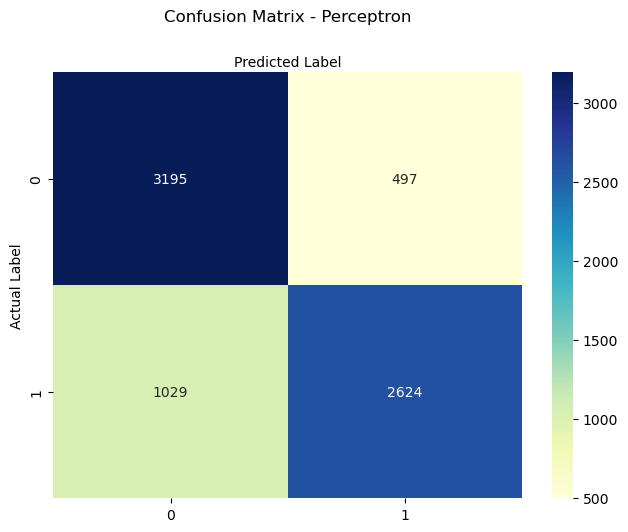

In [ ]:
from sklearn.linear_model import Perceptron
# Perceptron model
perceptron = Perceptron()

# Train the Perceptron model on the resampled training data
perceptron.fit(X_train, y_train)

# Check accuracy on the original (non-resampled) training set
acc_perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
print(f"Perceptron accuracy on original training set: {acc_perceptron_train}%")

# Check accuracy on the test set
acc_perceptron_test = round(perceptron.score(X_test, y_test) * 100, 2)
print(f"Perceptron accuracy on test set: {acc_perceptron_test}%")

from sklearn.metrics import confusion_matrix

# Assuming you have already trained your Perceptron model and made predictions
y_pred_perceptron = perceptron.predict(X_test)  # Make predictions on the test set
cnf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)  # Calculate the confusion matrix

# Visualizing the confusion matrix
class_names = [0, 1]  # Name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_perceptron), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Perceptron', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



<u><b><h4>KNN:</h4></b></u>

KNN accuracy on original training set: 95.78%
KNN accuracy on test set: 92.25%


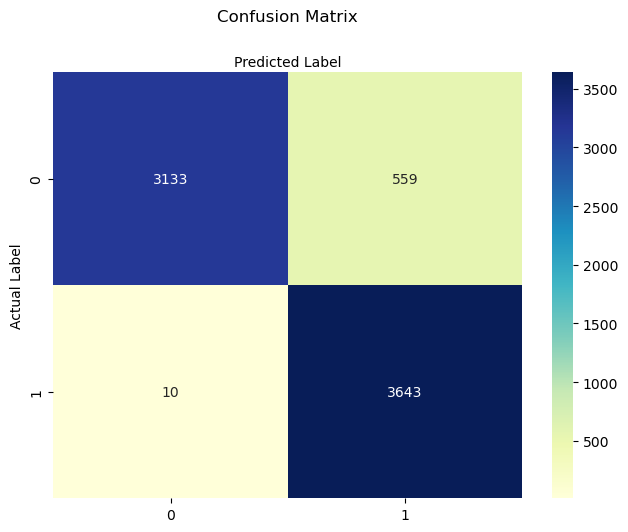

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model on the resampled training data
knn.fit(X_train, y_train)

# Check accuracy on the original (non-resampled) training set
acc_knn_train = round(knn.score(X_train, y_train) * 100, 2)
print(f"KNN accuracy on original training set: {acc_knn_train}%")

# Check accuracy on the test set
acc_knn_test = round(knn.score(X_test, y_test) * 100, 2)
print(f"KNN accuracy on test set: {acc_knn_test}%")

from sklearn.metrics import confusion_matrix

# Assuming you have already trained your KNN model and made predictions
y_pred = knn.predict(X_test)  # Make predictions on the test set
cnf_matrix = confusion_matrix(y_test, y_pred)  # Calculate the confusion matrix

# Visualizing the confusion matrix
class_names = [0, 1]  # Name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


<u><b><h4>Naive bayesian classification:</h4></b></u>

Naive Bayes accuracy on original training set: 76.79%
Naive Bayes accuracy on test set: 77.99%


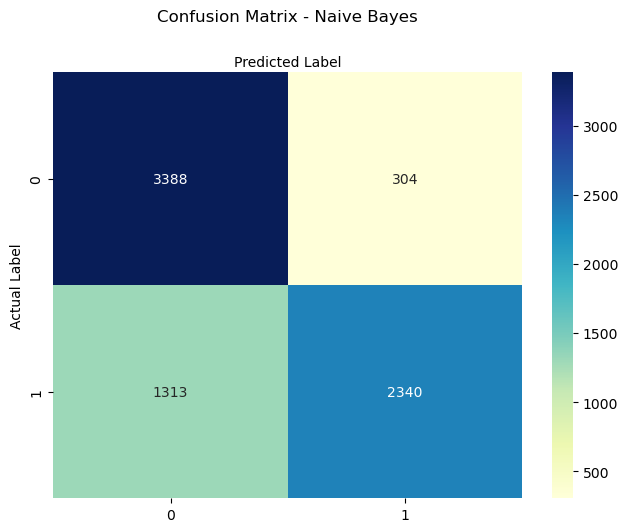

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes (GaussianNB) model
naive = GaussianNB()

# Train the GaussianNB model on the resampled training data
naive.fit(X_train, y_train)

# Check accuracy on the original (non-resampled) training set
acc_naive_train = round(naive.score(X_train, y_train) * 100, 2)
print(f"Naive Bayes accuracy on original training set: {acc_naive_train}%")

# Check accuracy on the test set
acc_naive_test = round(naive.score(X_test, y_test) * 100, 2)
print(f"Naive Bayes accuracy on test set: {acc_naive_test}%")

from sklearn.metrics import confusion_matrix

# Assuming you have already trained your Naive Bayes model and made predictions
y_pred_naive = naive.predict(X_test)  # Make predictions on the test set
cnf_matrix_naive = confusion_matrix(y_test, y_pred_naive)  # Calculate the confusion matrix

# Visualizing the confusion matrix
class_names = [0, 1]  # Name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_naive), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Naive Bayes', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


<u><b><h4>Logistic Regression:</h4></b></u>

![image.png](attachment:628b9ca4-94c5-498e-914c-d327ab7d05cd.png)

Logistic Regression accuracy on original training set: 88.68%
Logistic Regression accuracy on test set: 88.99%


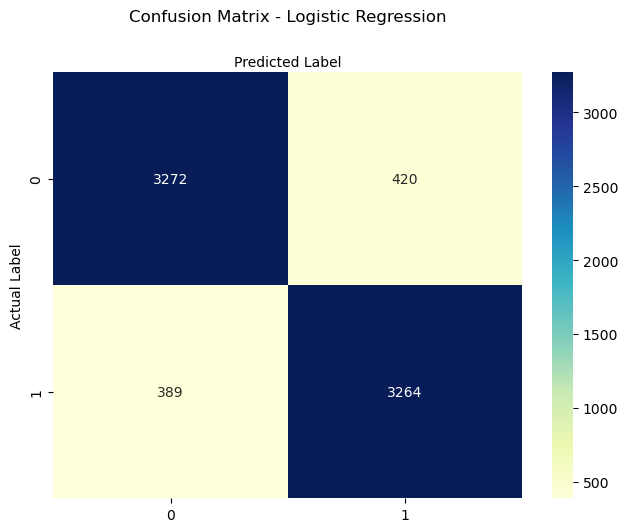

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Logistic Regression model with increased max_iter
logreg = LogisticRegression(max_iter=200)

# Train the model on the scaled training data
logreg.fit(X_train_scaled, y_train)

# Check accuracy on the scaled training set
acc_log = round(logreg.score(X_train_scaled, y_train) * 100, 2)
print(f"Logistic Regression accuracy on original training set: {acc_log}%")

# Check accuracy on the scaled test set
acc_log_test = round(logreg.score(X_test_scaled, y_test) * 100, 2)
print(f"Logistic Regression accuracy on test set: {acc_log_test}%")


from sklearn.metrics import confusion_matrix

# Assuming you have already trained your Logistic Regression model and made predictions
y_pred_log = logreg.predict(X_test_scaled)  # Make predictions on the test set
cnf_matrix_log = confusion_matrix(y_test, y_pred_log)  # Calculate the confusion matrix

# Visualizing the confusion matrix
class_names = [0, 1]  # Name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Logistic Regression', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



<u><b><h4>SVM:</h4></b></u>

![image.png](attachment:376ded4c-85d5-4f3c-a4a6-5fdb2988d685.png)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVC accuracy on original training set: 77.35%
Linear SVC accuracy on test set: 78.67%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


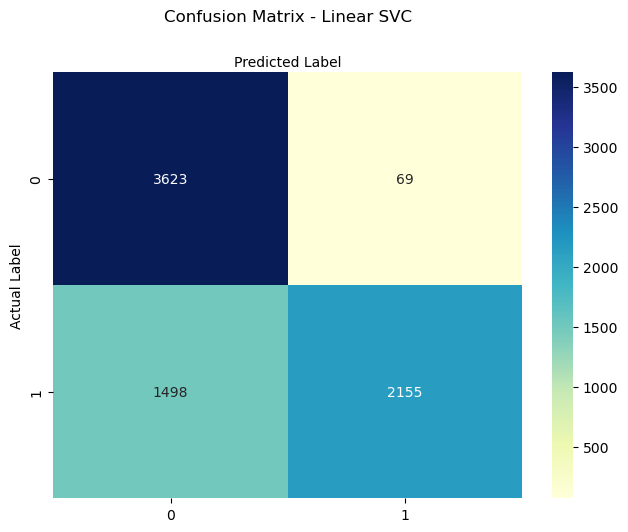

In [ ]:
from sklearn.svm import SVC,LinearSVC
# Linear Support Vector Classifier (LinearSVC)
linear_svc = LinearSVC()

# Train the LinearSVC model on the resampled training data
linear_svc.fit(X_train, y_train)

# Check accuracy on the original (non-resampled) training set
acc_linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
print(f"Linear SVC accuracy on original training set: {acc_linear_svc_train}%")

# Check accuracy on the test set
acc_linear_svc_test = round(linear_svc.score(X_test, y_test) * 100, 2)
print(f"Linear SVC accuracy on test set: {acc_linear_svc_test}%")


from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred_svc = linear_svc.predict(X_test)  # Use the test set to get predictions
cnf_matrix_svc = confusion_matrix(y_test, y_pred_svc)  # Calculate the confusion matrix

# Visualizing the confusion matrix
class_names = [0, 1]  # Name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Linear SVC', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


<u><b><h4>In conclusion:</h4></b></u>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Support Vector Machine
linear_svc = LinearSVC(max_iter=1000)  # Increase max_iter if necessary
linear_svc.fit(X_train, y_train)
y_pred_svc = linear_svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))

# Naive Bayes
naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred_naive = naive.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_naive))

# Perceptron
perceptron = Perceptron(max_iter=1000)  # Increase max_iter if necessary
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_perceptron))

# Optional: Print classification reports for more metrics
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))
print("Classification Report for SVC:\n", classification_report(y_test, y_pred_svc))
print("Classification Report for Naive Bayes:\n", classification_report(y_test, y_pred_naive))
print("Classification Report for Perceptron:\n", classification_report(y_test, y_pred_perceptron))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8834581347855684
KNN Accuracy: 0.9225323349217155


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC Accuracy: 0.8661674608577263
Naive Bayes Accuracy: 0.7798502382573179
Perceptron Accuracy: 0.7922396187882913

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      3692
           1       0.88      0.89      0.88      3653

    accuracy                           0.88      7345
   macro avg       0.88      0.88      0.88      7345
weighted avg       0.88      0.88      0.88      7345

Classification Report for KNN:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      3692
           1       0.87      1.00      0.93      3653

    accuracy                           0.92      7345
   macro avg       0.93      0.92      0.92      7345
weighted avg       0.93      0.92      0.92      7345

Classification Report for SVC:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      3692
          

<h2><u><b id="Winning-model">Winning model</b></u></h2>


#### KNN with 95.78% of our training data and 92.25% of our test data!

<hr style="border: 2px solid black;"/>


<h2><u><b id="Part-5-After-PCA">Part 5 - After PCA</b></u></h2>

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Separate features (X) and target (y)
X = data.drop(columns=['dead_5y'])  # Remove target column 'dead_5y'
y = data['dead_5y']  # Target column

# Step 2: Convert categorical columns to numeric using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 3: Normalize the features to ensure they are on the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 4: Perform PCA to reduce dimensionality to two components
pca = PCA(n_components=2)  # Reduce to two dimensions
X_pca = pca.fit_transform(X_scaled)

# Step 5: Split the dataset into training and test sets (80% training, 20% testing)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 6: Calculate the centroid (center of mass) of the points
centroid = np.mean(X_pca, axis=0)
print(f"Centroid (Center of Mass): {centroid}")

# Step 7: Calculate the maximum distance from the centroid (radius of coverage)
distances = np.linalg.norm(X_pca - centroid, axis=1)
radius = np.max(distances)
print(f"Radius of Coverage: {radius}")



print(f"Shape of X_train before PCA: {X_train.shape}")
print(f"Shape of X_train after PCA: {X_train_pca.shape}")
print(f"Shape of X_test before PCA: {X_test.shape}")
print(f"Shape of X_test after PCA: {X_test_pca.shape}")


Centroid (Center of Mass): [-1.0138216e-16  2.5019739e-16]
Radius of Coverage: 10.007389926808752
Shape of X_train before PCA: (17137, 37)
Shape of X_train after PCA: (9950, 2)
Shape of X_test before PCA: (7345, 37)
Shape of X_test after PCA: (2488, 2)


<u><b><h4>Perceptron:</h4></b></u>

Perceptron accuracy on PCA-transformed training set: 98.44%
Perceptron accuracy on PCA-transformed test set: 98.27%


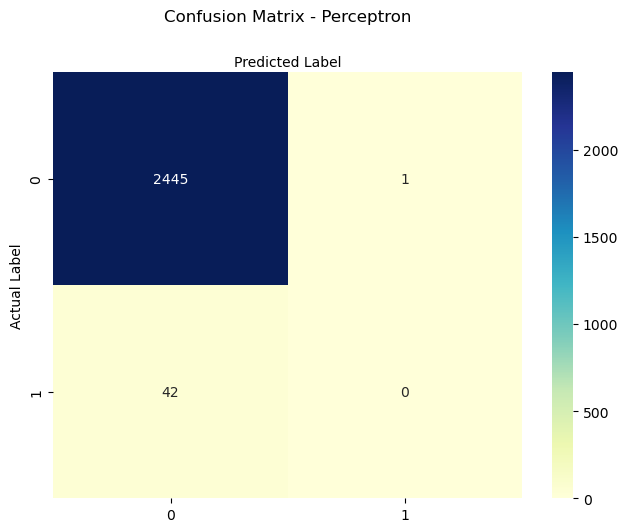

In [ ]:
from sklearn.linear_model import Perceptron
# Perceptron model
perceptron = Perceptron()

# Train the Perceptron model on the PCA-transformed training data
perceptron.fit(X_train_pca, y_train)

# Check accuracy on the PCA-transformed training set
acc_perceptron_train = round(perceptron.score(X_train_pca, y_train) * 100, 2)
print(f"Perceptron accuracy on PCA-transformed training set: {acc_perceptron_train}%")

# Check accuracy on the PCA-transformed test set
acc_perceptron_test = round(perceptron.score(X_test_pca, y_test) * 100, 2)
print(f"Perceptron accuracy on PCA-transformed test set: {acc_perceptron_test}%")

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred_perceptron = perceptron.predict(X_test_pca)  # Predict on PCA-transformed test set
cnf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)  # Calculate confusion matrix

# Visualizing the confusion matrix
class_names = [0, 1]  # Define class labels (adjust based on your classes)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_perceptron), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Perceptron', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



<u><b><h4>KNN algo:</h4></b></u>

KNN accuracy on PCA-transformed training set: 98.45%
KNN accuracy on PCA-transformed test set: 98.27%


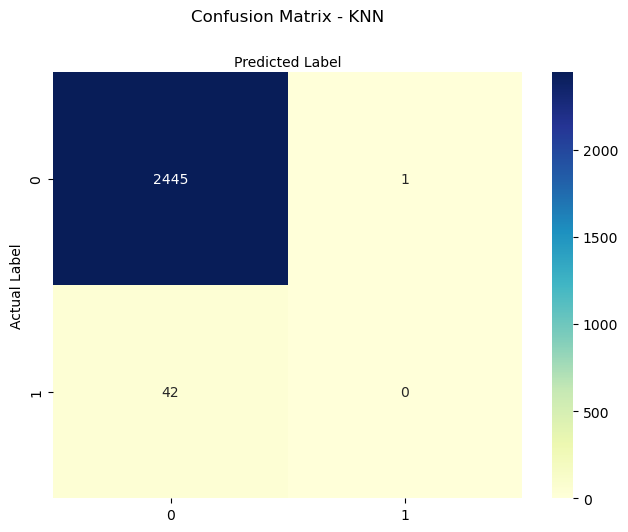

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model on the PCA-transformed training data
knn.fit(X_train_pca, y_train)

# Check accuracy on the PCA-transformed training set
acc_knn_train = round(knn.score(X_train_pca, y_train) * 100, 2)
print(f"KNN accuracy on PCA-transformed training set: {acc_knn_train}%")

# Check accuracy on the PCA-transformed test set
acc_knn_test = round(knn.score(X_test_pca, y_test) * 100, 2)
print(f"KNN accuracy on PCA-transformed test set: {acc_knn_test}%")


from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_pca)  # Predict on PCA-transformed test set
cnf_matrix_knn = confusion_matrix(y_test, y_pred_knn)  # Calculate confusion matrix

# Visualizing the confusion matrix
class_names = [0, 1]  # Define class labels (adjust based on your classes)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - KNN', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


<u><b><h4>Naive Bisani classification:</h4></b></u>

Naive Bayes accuracy on PCA-transformed training set: 98.29%
Naive Bayes accuracy on PCA-transformed test set: 98.31%


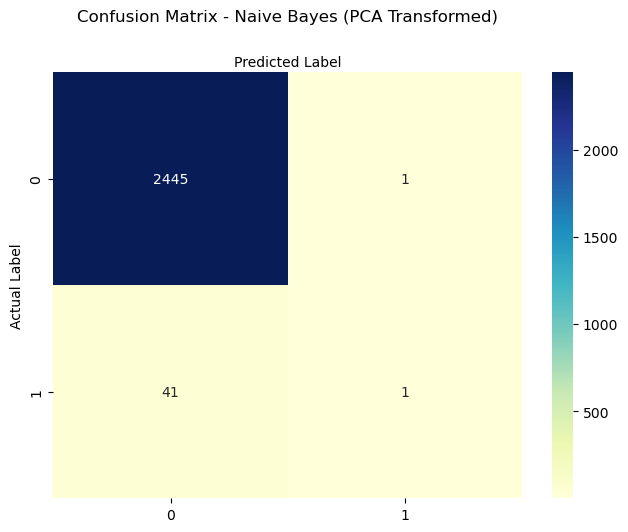

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes (GaussianNB) model
naive = GaussianNB()

# Train the GaussianNB model on the PCA-transformed training data
naive.fit(X_train_pca, y_train)

# Check accuracy on the PCA-transformed training set
acc_naive_train = round(naive.score(X_train_pca, y_train) * 100, 2)
print(f"Naive Bayes accuracy on PCA-transformed training set: {acc_naive_train}%")

# Check accuracy on the PCA-transformed test set
acc_naive_test = round(naive.score(X_test_pca, y_test) * 100, 2)
print(f"Naive Bayes accuracy on PCA-transformed test set: {acc_naive_test}%")


from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred_naive = naive.predict(X_test_pca)  # Predict on PCA-transformed test set
cnf_matrix_naive = confusion_matrix(y_test, y_pred_naive)  # Calculate confusion matrix

# Visualizing the confusion matrix
class_names = [0, 1]  # Define class labels (adjust based on your classes)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_naive), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Naive Bayes (PCA Transformed)', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


<u><b><h4>Logistic Regression:</h4></b></u>

Logistic Regression accuracy on PCA-transformed training set: 98.44%
Logistic Regression accuracy on PCA-transformed test set: 98.31%


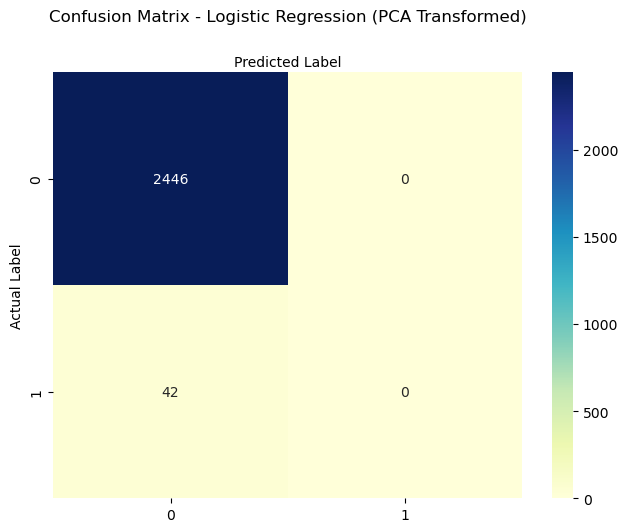

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Train the model on the PCA-transformed and scaled training data
logreg.fit(X_train_pca, y_train)

# Check accuracy on the PCA-transformed and scaled training set
acc_log = round(logreg.score(X_train_pca, y_train) * 100, 2)
print(f"Logistic Regression accuracy on PCA-transformed training set: {acc_log}%")

# Check accuracy on the PCA-transformed and scaled test set
acc_log_test = round(logreg.score(X_test_pca, y_test) * 100, 2)
print(f"Logistic Regression accuracy on PCA-transformed test set: {acc_log_test}%")


from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test_pca)  # Predict on PCA-transformed test set
cnf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)  # Calculate confusion matrix

# Visualizing the confusion matrix
class_names = [0, 1]  # Define class labels (adjust based on your classes)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Logistic Regression (PCA Transformed)', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



<u><b><h4>SVM algo:</h4></b></u>

Linear SVC accuracy on PCA-transformed training set: 98.44%
Linear SVC accuracy on PCA-transformed test set: 98.31%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


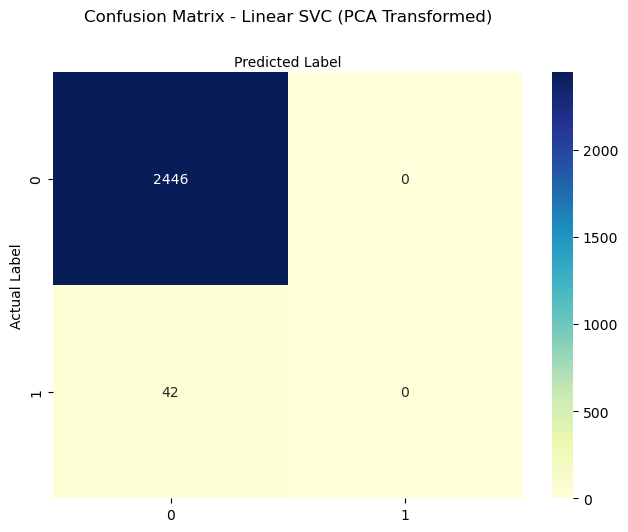

In [ ]:
from sklearn.svm import SVC,LinearSVC

# Linear Support Vector Classifier (LinearSVC)
linear_svc = LinearSVC(dual=True)  # or dual=False depending on your preference

# Train the LinearSVC model on the PCA-transformed training data
linear_svc.fit(X_train_pca, y_train)

# Check accuracy on the PCA-transformed training set
acc_linear_svc_train = round(linear_svc.score(X_train_pca, y_train) * 100, 2)
print(f"Linear SVC accuracy on PCA-transformed training set: {acc_linear_svc_train}%")

# Check accuracy on the PCA-transformed test set
acc_linear_svc_test = round(linear_svc.score(X_test_pca, y_test) * 100, 2)
print(f"Linear SVC accuracy on PCA-transformed test set: {acc_linear_svc_test}%")


from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred_linear_svc = linear_svc.predict(X_test_pca)  # Predict on PCA-transformed test set
cnf_matrix_linear_svc = confusion_matrix(y_test, y_pred_linear_svc)  # Calculate confusion matrix

# Visualizing the confusion matrix
class_names = [0, 1]  # Define class labels (adjust based on your classes)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_linear_svc), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Linear SVC (PCA Transformed)', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
